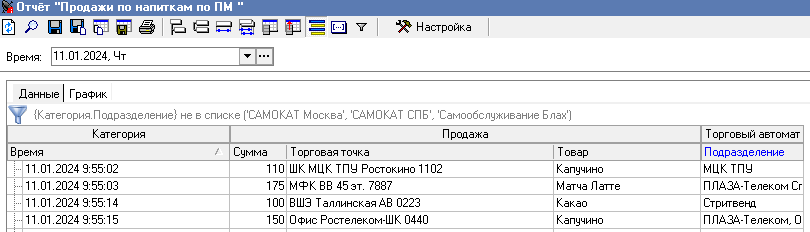

In [1]:
import pandas as pd
import numpy as np
import datetime
import xlrd

In [47]:
workbook = xlrd.open_workbook('receipts1701.xls', encoding_override="cp1251")
receipts = pd.read_excel(workbook,
                         skiprows=1,
                         usecols=[0, 1, 2, 5, 10, 16, 23, 24],
                         names=['deleted',
                                'number',
                                'date',
                                'sum',
                                'tt',
                                'beznal_sum',
                                'fp_date',
                                'create_date'],
                         dtype={'number': str, 'sum': int})

In [48]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deleted      6400 non-null   int64  
 1   number       6400 non-null   object 
 2   date         6400 non-null   object 
 3   sum          6400 non-null   int32  
 4   tt           6400 non-null   object 
 5   beznal_sum   6400 non-null   float64
 6   fp_date      6400 non-null   object 
 7   create_date  6400 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 375.1+ KB


In [9]:
#receipts['date'] = pd.to_datetime(receipts['date'], format='%d.%m.%Y %H:%M:%S').astype('str')

In [50]:
receipts['date'] = receipts['date'].str[:-4] #удалить секунды и минуты

In [51]:
receipts.head()

,deleted,number,date,sum,tt,beznal_sum,fp_date,create_date
0,0,8169295.0,17.01.2024 0:01,100,ТАСС АВ 0148,0.0,17.01.2024,17.01.2024 0:01:48
1,0,8169296.0,17.01.2024 0:02,200,АВ - Таганская 0205,0.0,17.01.2024 0:01:00,17.01.2024 0:02:15
2,0,8169297.0,17.01.2024 0:02,200,АВ - Жулебинский б-р 0182,200.0,17.01.2024 0:01:00,17.01.2024 0:02:22
3,0,8169298.0,17.01.2024 0:05,170,МЦД 3 Ховрино ТПУ ШК 1й путь 3101,170.0,17.01.2024 0:04:00,17.01.2024 0:05:48
4,0,8169299.0,17.01.2024 0:05,150,МЦК КХ Ботанич.сад ост.0316,150.0,17.01.2024 0:04:00,17.01.2024 0:05:49


In [60]:
receipts[receipts['tt'] == 'МЦК КХ Деловой центр 0388']

,deleted,number,date,sum,tt,beznal_sum,fp_date,create_date
693,0,8169987.0,17.01.2024 7:57,110,МЦК КХ Деловой центр 0388,110.0,17.01.2024 7:56:00,17.01.2024 7:57:36
1748,0,8171033.0,17.01.2024 9:36,110,МЦК КХ Деловой центр 0388,110.0,17.01.2024 9:35:00,17.01.2024 9:36:40
2130,0,8171426.0,17.01.2024 10:17,90,МЦК КХ Деловой центр 0388,90.0,17.01.2024 10:17:00,17.01.2024 10:18:05
3096,0,8172385.0,17.01.2024 12:30,100,МЦК КХ Деловой центр 0388,100.0,17.01.2024 12:29:00,17.01.2024 12:30:46
3865,0,8173162.0,17.01.2024 14:17,100,МЦК КХ Деловой центр 0388,100.0,17.01.2024 14:17:00,17.01.2024 14:17:54
4128,0,8173423.0,17.01.2024 14:55,110,МЦК КХ Деловой центр 0388,110.0,17.01.2024 14:54:00,17.01.2024 14:55:26
4186,0,8173479.0,17.01.2024 15:04,150,МЦК КХ Деловой центр 0388,150.0,17.01.2024 15:03:00,17.01.2024 15:04:20
4341,0,8173635.0,17.01.2024 15:27,150,МЦК КХ Деловой центр 0388,150.0,17.01.2024 15:26:00,17.01.2024 15:27:56
4542,0,8173837.0,17.01.2024 15:57,150,МЦК КХ Деловой центр 0388,150.0,17.01.2024 15:57:00,17.01.2024 15:58:00
4588,0,8173882.0,17.01.2024 16:06,100,МЦК КХ Деловой центр 0388,100.0,17.01.2024 16:06:00,17.01.2024 16:07:00


In [48]:
#df = receipts.groupby([receipts['receipt_date'].dt.date, 'tt'])

In [53]:
#df = df['sum'].sum().reset_index()

In [114]:
#df.head()

,receipt_date,tt,sum
0,2024-01-11,INDANCE-КХ 0165,1300.0
1,2024-01-11,Russia Today-АВ 0436,2750.0
2,2024-01-11,Russia Today-ШК 0435,8195.0
3,2024-01-11,АВ - Арбат 0185,1250.0
4,2024-01-11,АВ - Варшаское шоссе 0181,3650.0


In [52]:
report = pd.read_excel('report1701.xls',
                         names=['date',
                                'sum',
                                'tt',
                                'division'])

In [53]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6422 entries, 0 to 6421
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      6422 non-null   object
 1   sum       6422 non-null   int64 
 2   tt        6422 non-null   object
 3   division  6422 non-null   object
dtypes: int64(1), object(3)
memory usage: 200.8+ KB


In [54]:
report['date'] = report['date'].astype('str').str[:-4] #удалить секунды и минуты

In [55]:
report.head()

,date,sum,tt,division
0,17.01.2024 0:01,100,ТАСС АВ 0148,Стритвенд
1,17.01.2024 0:02,200,АВ - Таганская 0205,Азбука Вкуса
2,17.01.2024 0:02,200,АВ - Жулебинский б-р 0182,Азбука Вкуса
3,17.01.2024 0:05,170,МЦД 3 Ховрино ТПУ ШК 1й путь 3101,МЦД-3
4,17.01.2024 0:05,150,МЦК КХ Ботанич.сад ост.0316,МЦК КХ


In [56]:
report['sum'].sum()

771980

In [76]:
#report['datetime'] = pd.to_datetime(report['datetime'], format='%d.%m.%Y %H:%M:%S')

In [79]:
#report['date'] = report['datetime'].dt.strftime('%Y-%m-%d')

In [116]:
#report_group = report.groupby(['date', 'tt'])['sum'].sum().reset_index()

In [133]:
#df['sum'] = df['sum'].astype('int64')

In [141]:
#df.rename({'receipt_date':'date'}, axis='columns', inplace=True)

In [58]:
df_merged = receipts.merge(report,
                     how='outer',
                     on=['date', 'tt', 'sum'],
                     indicator=True)

In [59]:
df_merged.to_excel('temp.xlsx')

In [152]:
df.groupby('date')['sum'].sum()

date
2024-01-11    728720
2024-01-12    738970
2024-01-13    433075
Name: sum, dtype: int64